In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stanza
import spacy_stanza
from wordcloud import WordCloud
import re
import string
import warnings 
warnings.filterwarnings('ignore')

In [6]:
# !pip install spacy_stanza

In [20]:
stanza.download('en')
nlp = spacy_stanza.load_pipeline('en', processors='tokenize,mwt,pos,lemma', pos_batch_size=20000)

2022-05-21 08:05:54 INFO: Downloading default packages for language: en (English)...
2022-05-21 08:05:55 INFO: File exists: /root/stanza_resources/en/default.zip.
2022-05-21 08:06:01 INFO: Finished downloading models and saved to /root/stanza_resources.
2022-05-21 08:06:01 WARNING: Can not find mwt: default from official model list. Ignoring it.
2022-05-21 08:06:01 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |

2022-05-21 08:06:01 INFO: Use device: cpu
2022-05-21 08:06:01 INFO: Loading: tokenize
2022-05-21 08:06:01 INFO: Loading: pos
2022-05-21 08:06:01 INFO: Loading: lemma
2022-05-21 08:06:01 INFO: Done loading processors!


In [8]:
df = pd.read_csv('7817_1.csv')

In [9]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [10]:
df['reviews.rating'].value_counts()

5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: reviews.rating, dtype: int64

In [11]:
df.dropna(subset=['reviews.rating'], inplace=True)

In [12]:
df.isna().sum()

id                         0
asins                      0
brand                      0
categories                 0
colors                   508
dateAdded                  0
dateUpdated                0
dimension                620
ean                      484
keys                       0
manufacturer             451
manufacturerNumber       479
name                       0
prices                     0
reviews.date             217
reviews.doRecommend      638
reviews.numHelpful       277
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.userCity        1177
reviews.userProvince    1177
reviews.username           0
sizes                   1177
upc                      484
weight                   525
dtype: int64

In [13]:
data = df[['reviews.rating', 'reviews.text']]

In [14]:
data.head()

,reviews.rating,reviews.text
0,5.0,I initially had trouble deciding between the p...
1,5.0,Allow me to preface this with a little history...
2,4.0,I am enjoying it so far. Great for reading. Ha...
3,5.0,I bought one of the first Paperwhites and have...
4,5.0,I have to say upfront - I don't like coroporat...


In [15]:
data.rename(columns={'reviews.rating': 'rating', 'reviews.text':'text'}, inplace=True)

In [16]:
data.head()

,rating,text
0,5.0,I initially had trouble deciding between the p...
1,5.0,Allow me to preface this with a little history...
2,4.0,I am enjoying it so far. Great for reading. Ha...
3,5.0,I bought one of the first Paperwhites and have...
4,5.0,I have to say upfront - I don't like coroporat...


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 0 to 1596
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  1177 non-null   float64
 1   text    1177 non-null   object 
dtypes: float64(1), object(1)
memory usage: 27.6+ KB


In [18]:
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

# Lower casing
def lower(text):
    low_text = text.lower()
    return low_text

# Number removal
def remove_num(text):
    remove = re.sub(r'\d+', '' ,text)
    return remove

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

def lemmatizer(text):  
  doc = nlp(text)
  return ' '.join([word.lemma_ for word in doc])

In [21]:
data['text'] = data['text'].apply(lambda x: remove_urls(x))
data['text'] = data['text'].apply(lambda x: remove_html(x))
data['text'] = data['text'].apply(lambda x: lower(x))
data['text'] = data['text'].apply(lambda x: remove_num(x))
data['text'] = data['text'].apply(lambda x: punctuation_removal(x))
data['text'] = data['text'].apply(lambda x: lemmatizer(x))

In [25]:
data['text']

0       I initially have trouble decide between the pa...
1       allow I to preface this with a little history ...
2       I be enjoy it so far great for reading have th...
3       I buy one of the first paperwhite and have be ...
4       I have to say upfront   I do like coroporate h...
                              ...                        
1592    this be not the same remote that I get for my ...
1593    I have have to change the battery in this remo...
1594    remote do not activate nor do it connect to bo...
1595    it do the job but be super over price I feel l...
1596    I order this item to replace the one that no l...
Name: text, Length: 1177, dtype: object

In [26]:
X = data['text']
y = data['rating']

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [28]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

In [42]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [43]:
X_train_vec

<941x27721 sparse matrix of type '<class 'numpy.float64'>'
	with 89511 stored elements in Compressed Sparse Row format>

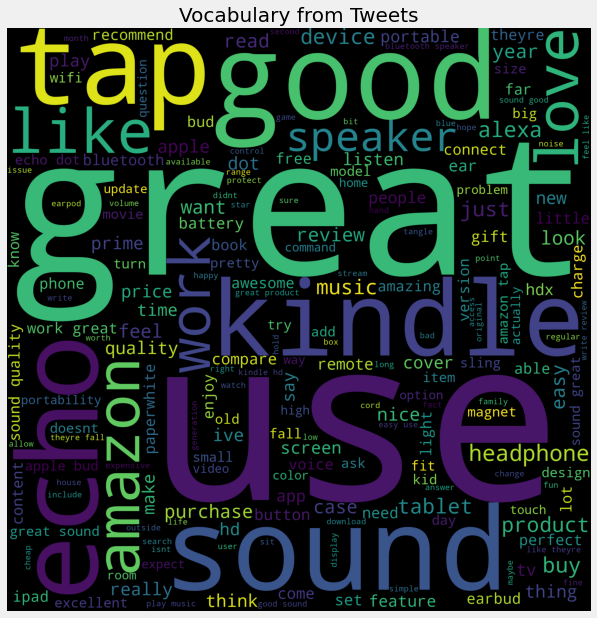

In [44]:
sum_words = X_train_vec.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Tweets", fontsize = 20)
plt.show()

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
nb = MultinomialNB()

In [48]:
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [49]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [50]:
def report(model):
    preds = model.predict(X_test_vec)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_vec,y_test)

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00         1
         3.0       1.00      0.27      0.43        33
         4.0       1.00      0.12      0.22        33
         5.0       0.73      1.00      0.84       163

    accuracy                           0.75       236
   macro avg       0.55      0.28      0.30       236
weighted avg       0.78      0.75      0.67       236



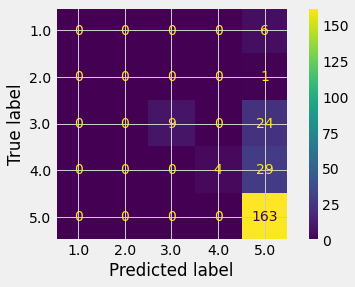

In [52]:
report(nb)